# An Introduction to Spider Circadian Rhythms and Analysis
## Fall 2023 Research Experience in the Toporikova Lab, Washington & Lee University
Naija Barakat ('24), Neuroscience Department

In [10]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
sns.set()

In [11]:
#Import data, create dfs and drop any empty rows
red = pd.read_csv("Steatoda LD and DD red light.csv")
red["Light"].replace(" ", np.nan, inplace= True) #This converts any cell in the "Light" column without a value (an empty space) to "Nan"
red.dropna(subset = ["Light"], inplace= True) #Here we drop any cells containing the "Nan"
#This function can also be edited to address timepoints outside of time or date of interest
#Change the ["column"] to the time/date column title and the first argument of the replace function to the time or date you wish to drop

#Convert date_time column to datetime format
red["Date_Time"]= pd.to_datetime(red["Date_Time"])

#Set date_time column as index
red = red.set_index("Date_Time")
red.head(10)

,Light,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-10-06 15:01:00,1,2,0,0,0,3,0,3,4,0,...,0,3,2,1,0,2,2,0,0,6
2023-10-06 15:02:00,1,9,0,0,7,0,0,1,2,0,...,0,2,1,0,0,0,2,0,0,2
2023-10-06 15:03:00,1,3,0,0,2,2,0,1,7,0,...,0,1,3,1,0,0,4,0,0,4
2023-10-06 15:04:00,1,4,0,0,6,0,0,4,4,4,...,0,2,0,1,0,0,2,0,0,4
2023-10-06 15:05:00,1,2,0,0,10,0,0,2,3,4,...,0,4,2,2,0,0,6,0,0,1
2023-10-06 15:06:00,1,3,0,0,5,0,6,2,1,3,...,0,1,0,2,0,0,3,0,0,5
2023-10-06 15:07:00,1,0,0,2,1,0,4,6,2,5,...,0,1,1,1,0,0,2,0,0,1
2023-10-06 15:08:00,1,9,0,4,10,0,7,0,2,3,...,0,3,1,4,0,0,4,0,0,3
2023-10-06 15:09:00,1,6,0,1,14,0,0,0,1,3,...,0,4,0,1,0,0,12,0,0,1


In [12]:
#Repeat with second population
white = pd.read_csv("Steatoda LD white light.csv")
white["Light"].replace(" ", np.nan, inplace= True)
white.dropna(subset = ["Light"], inplace= True)
white["Date_Time"]= pd.to_datetime(white["Date_Time"])

white = white.set_index("Date_Time")
white.head(10)

,Light,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-11-17 15:35:00,1,1,2,0,0,0,1,1,0,1,...,0,0,1,0,0,0,3,0,0,0
2023-11-17 15:36:00,1,3,5,0,0,0,3,3,0,0,...,2,0,1,0,0,0,2,0,0,0
2023-11-17 15:37:00,1,8,1,0,0,0,1,3,0,0,...,2,0,0,0,0,0,0,0,0,0
2023-11-17 15:38:00,1,0,2,0,0,0,0,6,0,3,...,0,0,3,0,3,0,0,0,0,0
2023-11-17 15:39:00,1,0,0,0,0,0,1,4,0,1,...,0,0,4,0,2,0,2,0,0,0
2023-11-17 15:40:00,1,3,0,0,0,0,1,2,0,0,...,0,0,2,0,1,0,0,0,0,0
2023-11-17 15:41:00,1,7,0,0,1,0,2,4,0,0,...,0,0,3,0,0,0,2,0,0,0
2023-11-17 15:42:00,1,1,1,1,4,0,2,4,0,0,...,0,0,0,0,1,3,1,1,0,0
2023-11-17 15:43:00,1,0,0,0,3,0,2,4,0,0,...,0,0,2,0,0,0,0,0,0,0


In [13]:
#Find average activity at each time point (a.k.a. across the rows), then rename
red_avg = pd.DataFrame(red.iloc[:,1:26].mean(axis=1))
#You'll want to change the iloc function to address 
red_avg.rename(columns={0:"Average Spider Activity under Red Light"})

,Average Spider Activity under Red Light
Date_Time,
2023-10-06 15:01:00,1.24
2023-10-06 15:02:00,1.32
2023-10-06 15:03:00,1.28
2023-10-06 15:04:00,1.28
2023-10-06 15:05:00,1.52
...,...
2023-10-20 17:26:00,0.32
2023-10-20 17:27:00,0.00
2023-10-20 17:28:00,0.00


In [14]:
#Repeat with second population
white_avg = pd.DataFrame(white.iloc[:,1:26].mean(axis=1))
white_avg.rename(columns={0:"Average Spider Activity under White Light"})

,Average Spider Activity under White Light
Date_Time,
2023-11-17 15:35:00,0.40
2023-11-17 15:36:00,0.84
2023-11-17 15:37:00,0.92
2023-11-17 15:38:00,0.80
2023-11-17 15:39:00,0.60
...,...
2023-11-28 09:13:00,0.52
2023-11-28 09:14:00,0.00
2023-11-28 09:15:00,0.00


In [15]:
#Find rolling average
red_roll = red_avg.rolling(window = "12H", axis = 0).mean()
white_roll = white_avg.rolling(window = "12H", axis = 0).mean()

<Axes: title={'center': '12hr Moving Average White Light'}, xlabel='Date_Time', ylabel='Light'>

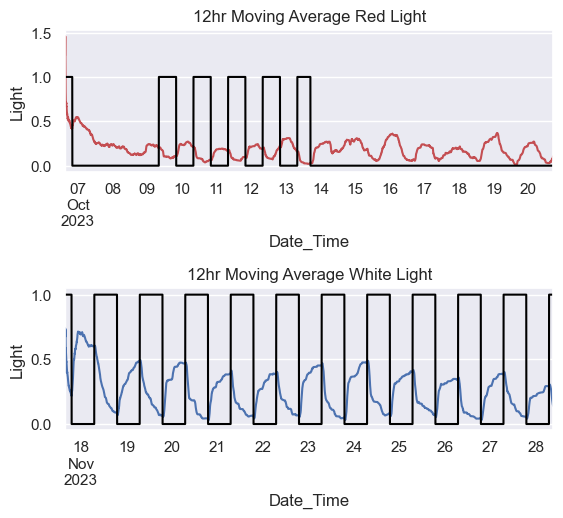

In [16]:
#Create plot to display both red and white data side-by-side
plot,sub = plt.subplots(2, sharex=False)
plot.set_size_inches(7, 6)
plot.tight_layout(pad=5.0)

red_roll.plot(color='r', title = "12hr Moving Average Red Light", ylabel = "Activity (Crossings)", xlabel="Date", 
              legend = False, ax=sub[0])
red['Light'].plot.line(color='black', ylabel = "Light", ax=sub[0])

white_roll.plot(color='b', title = "12hr Moving Average White Light", ylabel = "Activity (Crossings)", xlabel = "Date", 
                legend = False, ax=sub[1])
white['Light'].plot.line(color='black', ylabel = "Light", ax=sub[1])